<p style="align: center;"><img align=center src="https://cdnb.artstation.com/p/assets/covers/images/060/407/559/large/vahid-ghobadi-arfai-vahid-ghobadi-arfai-lo.jpg?1678483232" width=300 height=320/></p>
<h3 style="text-align: center;"><b>Семинар №5 ФЭФМ МФТИ</b></h3>

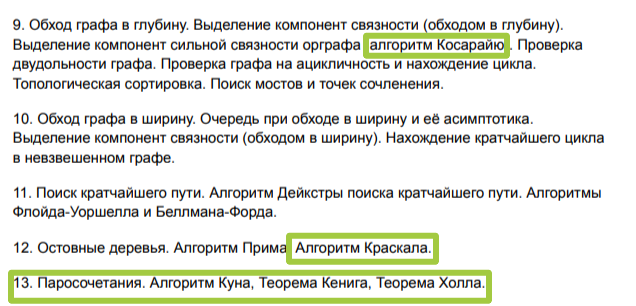

# Оптимизация циклов

In [7]:
def find_all_cycles(graph):
    def dfs(node, start, visited, path):
        visited.add(node) 
        path.append(node)
        
        for neighbor in graph[node]:
            if neighbor == start and len(path) > 2: # мы замкнули цикл!)
                cycles.append(path[:])
            elif neighbor not in visited:
                dfs(neighbor, start, visited, path)
        
        path.pop() 
        visited.remove(node)  
    
    cycles = []
    for node in graph:
        dfs(node, node, set(), [])
    return cycles

def find_shortest_cycle(graph):
    all_cycles = find_all_cycles(graph)
    if not all_cycles:
        return None
    return min(all_cycles, key=len)

unweighted_graph = {
    0: [1, 3],
    1: [0, 2, 3],
    2: [1, 5],
    3: [0, 1, 4],
    4: [3, 5],
    5: [4, 2]
}

# Поиск всех циклов
cycles = find_all_cycles(unweighted_graph)
print("Все циклы:", cycles)

# Поиск кратчайшего цикла
shortest_cycle = find_shortest_cycle(unweighted_graph)
print("Кратчайший цикл:", shortest_cycle)

Все циклы: [[0, 1, 2, 5, 4, 3], [0, 1, 3], [0, 3, 1], [0, 3, 4, 5, 2, 1], [1, 0, 3], [1, 0, 3, 4, 5, 2], [1, 2, 5, 4, 3, 0], [1, 2, 5, 4, 3], [1, 3, 0], [1, 3, 4, 5, 2], [2, 1, 0, 3, 4, 5], [2, 1, 3, 4, 5], [2, 5, 4, 3, 0, 1], [2, 5, 4, 3, 1], [3, 0, 1, 2, 5, 4], [3, 0, 1], [3, 1, 0], [3, 1, 2, 5, 4], [3, 4, 5, 2, 1, 0], [3, 4, 5, 2, 1], [4, 3, 0, 1, 2, 5], [4, 3, 1, 2, 5], [4, 5, 2, 1, 0, 3], [4, 5, 2, 1, 3], [5, 4, 3, 0, 1, 2], [5, 4, 3, 1, 2], [5, 2, 1, 0, 3, 4], [5, 2, 1, 3, 4]]
Кратчайший цикл: [0, 1, 3]


Упорядочивать вершины в циклах: Перед добавлением цикла в множество, можно отсортировать вершины, чтобы циклы, которые являются перестановками друг друга, считались одинаковыми.

Оптимизировать поиск циклов: В текущей реализации алгоритм может находить один и тот же цикл несколько раз, что замедляет выполнение. Мы можем избежать этого, если будем начинать поиск только с узлов, которые больше или равны начальному узлу.

In [12]:
def find_all_cycles(graph):
    def dfs(node, start, visited, path):
        visited.add(node)
        path.append(node)
        
        for neighbor in graph[node]:
            if neighbor == start and len(path) > 2:  # Мы замкнули цикл!
                cycle = tuple(sorted(path))  # Сортируем вершины цикла
                unique_cycles.add(cycle)
            elif neighbor not in visited and neighbor > start:  # Ищем только в одном направлении
                dfs(neighbor, start, visited, path)
        
        path.pop()
        visited.remove(node)
    
    unique_cycles = set() #а теперь посмотрите, что мы делали чуть выше?
    for node in graph:
        dfs(node, node, set(), [])
    
    return [list(cycle) for cycle in unique_cycles]

def find_shortest_cycle(graph):
    all_cycles = find_all_cycles(graph)
    if not all_cycles:
        return None
    return min(all_cycles, key=len)

unweighted_graph = {
    0: [1, 3],
    1: [0, 2, 3],
    2: [1, 5],
    3: [0, 1, 4],
    4: [3, 5],
    5: [4, 2]
}

# Поиск всех уникальных циклов
cycles = find_all_cycles(unweighted_graph)
print("Все уникальные циклы:", cycles)

# Поиск кратчайшего цикла
shortest_cycle = find_shortest_cycle(unweighted_graph)
print("Кратчайший цикл:", shortest_cycle)

Все уникальные циклы: [[0, 1, 2, 3, 4, 5], [0, 1, 3], [1, 2, 3, 4, 5]]
Кратчайший цикл: [0, 1, 3]


tuple(...) преобразует отсортированный список в кортеж. Например, tuple([1, 2, 3]) даст (1, 2, 3).

Кортеж используется потому, что он является неизменяемым типом данных, и его можно добавлять в множество (set), в отличие от списка (который изменяемый и не может быть элементом множества).

### А теперь в взвешенном

In [15]:
def find_all_weighted_cycles(graph, weights):
    def dfs(node, start, visited, path, weight_sum):
        visited.add(node)
        path.append(node)
        
        for neighbor in graph[node]:
            edge_weight = weights.get((node, neighbor)) or weights.get((neighbor, node))  
            if neighbor == start and len(path) > 2:
                cycles.append((path[:], weight_sum + edge_weight)) 
            elif neighbor not in visited:
                dfs(neighbor, start, visited, path, weight_sum + edge_weight)
        
        path.pop()
        visited.remove(node)
    
    cycles = []
    for node in graph:
        dfs(node, node, set(), [], 0)
    return cycles

def find_lightest_cycle(graph, weights):
    all_cycles = find_all_weighted_cycles(graph, weights)
    if not all_cycles:
        return None
    return min(all_cycles, key=lambda cycle: cycle[1]) 
    
weighted_graph = {
    0: [1, 3],
    1: [0, 2, 3],
    2: [1, 5],
    3: [0, 1, 4],
    4: [3, 5],
    5: [4, 2]
}

# Веса рёбер
edge_weights = {
    (0, 1): 2,
    (1, 0): 2,
    (1, 2): 3,
    (2, 1): 3,
    (1, 3): 4,
    (3, 1): 4,
    (3, 0): 1,
    (0, 3): 1,
    (2, 5): 5,
    (5, 2): 5,
    (3, 4): 6,
    (4, 3): 6,
    (4, 5): 2,
    (5, 4): 2
}

weighted_cycles = find_all_weighted_cycles(weighted_graph, edge_weights)
print("Все циклы с весами:", weighted_cycles)

lightest_cycle = find_lightest_cycle(weighted_graph, edge_weights)
print("Цикл с наименьшим весом:", lightest_cycle)

Все циклы с весами: [([0, 1, 2, 5, 4, 3], 19), ([0, 1, 3], 7), ([0, 3, 1], 7), ([0, 3, 4, 5, 2, 1], 19), ([1, 0, 3], 7), ([1, 0, 3, 4, 5, 2], 19), ([1, 2, 5, 4, 3, 0], 19), ([1, 2, 5, 4, 3], 20), ([1, 3, 0], 7), ([1, 3, 4, 5, 2], 20), ([2, 1, 0, 3, 4, 5], 19), ([2, 1, 3, 4, 5], 20), ([2, 5, 4, 3, 0, 1], 19), ([2, 5, 4, 3, 1], 20), ([3, 0, 1, 2, 5, 4], 19), ([3, 0, 1], 7), ([3, 1, 0], 7), ([3, 1, 2, 5, 4], 20), ([3, 4, 5, 2, 1, 0], 19), ([3, 4, 5, 2, 1], 20), ([4, 3, 0, 1, 2, 5], 19), ([4, 3, 1, 2, 5], 20), ([4, 5, 2, 1, 0, 3], 19), ([4, 5, 2, 1, 3], 20), ([5, 4, 3, 0, 1, 2], 19), ([5, 4, 3, 1, 2], 20), ([5, 2, 1, 0, 3, 4], 19), ([5, 2, 1, 3, 4], 20)]
Цикл с наименьшим весом: ([0, 1, 3], 7)


In [17]:
def find_all_weighted_cycles(graph, weights):
    def dfs(node, start, visited, path, weight_sum):
        visited.add(node)
        path.append(node)
        
        for neighbor in graph[node]:
            edge_weight = weights.get((node, neighbor)) or weights.get((neighbor, node))  
            if neighbor == start and len(path) > 2:
                # Сортируем вершины цикла и добавляем в множество
                cycle = tuple(sorted(path))
                unique_cycles.add((cycle, weight_sum + edge_weight)) 
            elif neighbor not in visited and neighbor > start:  # Ищем только в одном направлении
                dfs(neighbor, start, visited, path, weight_sum + edge_weight)
        
        path.pop()
        visited.remove(node)
    
    unique_cycles = set()
    for node in graph:
        dfs(node, node, set(), [], 0)
    
    # Преобразуем множество обратно в список для удобства
    return [list(cycle) for cycle in unique_cycles]

def find_lightest_cycle(graph, weights):
    all_cycles = find_all_weighted_cycles(graph, weights)
    if not all_cycles:
        return None
    # Находим цикл с минимальным весом
    return min(all_cycles, key=lambda cycle: cycle[1]) 
    
weighted_graph = {
    0: [1, 3],
    1: [0, 2, 3],
    2: [1, 5],
    3: [0, 1, 4],
    4: [3, 5],
    5: [4, 2]
}

# Веса рёбер
edge_weights = {
    (0, 1): 2,
    (1, 0): 2,
    (1, 2): 3,
    (2, 1): 3,
    (1, 3): 4,
    (3, 1): 4,
    (3, 0): 1,
    (0, 3): 1,
    (2, 5): 5,
    (5, 2): 5,
    (3, 4): 6,
    (4, 3): 6,
    (4, 5): 2,
    (5, 4): 2
}

# Поиск всех уникальных циклов с весами
weighted_cycles = find_all_weighted_cycles(weighted_graph, edge_weights)
print("Все уникальные циклы с весами:", weighted_cycles)

# Поиск цикла с наименьшим весом
lightest_cycle = find_lightest_cycle(weighted_graph, edge_weights)
print("Цикл с наименьшим весом:", lightest_cycle)

Все уникальные циклы с весами: [[(0, 1, 3), 7], [(1, 2, 3, 4, 5), 20], [(0, 1, 2, 3, 4, 5), 19]]
Цикл с наименьшим весом: [(0, 1, 3), 7]


# Остовные деревья

Наличие цикла в подграфе означает, что у нас есть лишнее ребро, поэтому нам не нужны никакие циклы. Так мы ищем связный подграф без циклов, который включает в себя все вершины исходного графа. Такой граф называется связным деревом.

Ниже показаны два графа со связными деревьями:


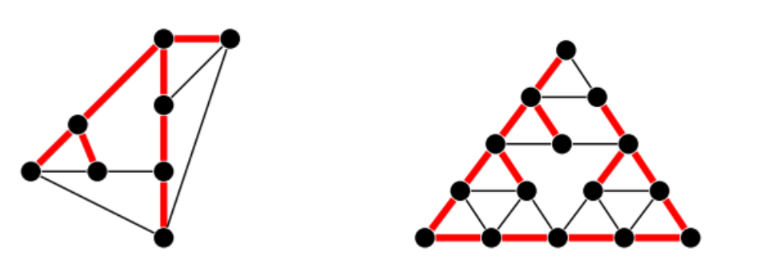

Остовное дерево — это частный случай связного дерева, применяемый к конкретному графу.

Остовное дерево — это ациклический подграф связного графа, который содержит все его вершины и также представляет собой дерево.

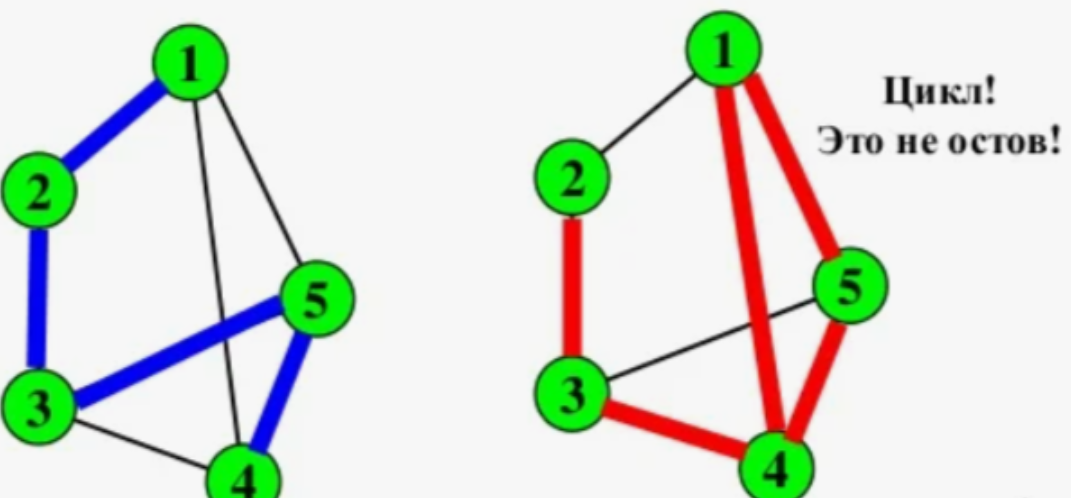

## Алгоритм Прима

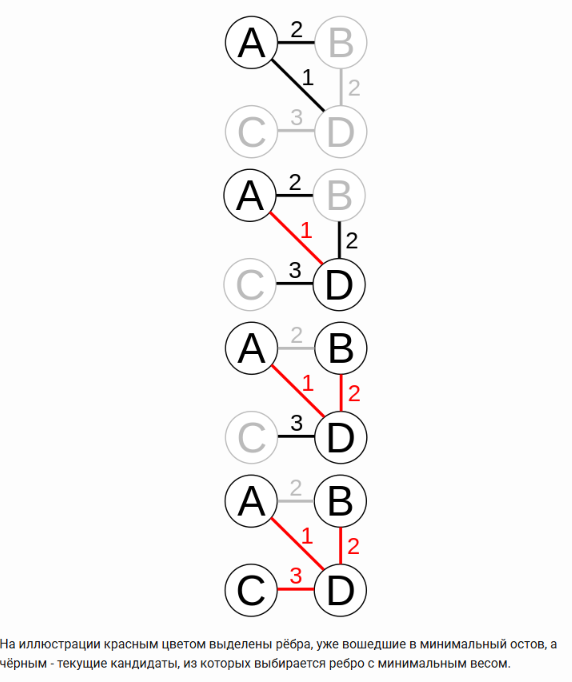

In [24]:
import heapq

def prim(graph, start):
    mst = []  # Минимальное остовное дерево
    visited = set([start])  # Посещенные вершины
    edges = [
        (weight, start, neighbor)
        for neighbor, weight in graph[start].items()
    ]
    print (edges)
    heapq.heapify(edges)  # Преобразуем список в кучу (min-heap), пользуемся библиотекой, так как не на контесте))

    while edges:  #То есть пока в куче есть ребра
        print(edges)
        weight, u, v = heapq.heappop(edges)  # Извлекаем ребро с минимальным весом
        if v not in visited:
            visited.add(v)  # Добавляем вершину в посещенные
            mst.append((u, v, weight))  # Добавляем ребро в MST

            # Добавляем рёбра, ведущие из новой вершины
            for neighbor, weight in graph[v].items():
                if neighbor not in visited:
                    heapq.heappush(edges, (weight, v, neighbor)) # помещаем в edges
    print(edges)
    return mst

graph = {
    'A': {'B': 2, 'D': 3},
    'B': {'A': 2, 'C': 1, 'D': 4},
    'C': {'B': 1, 'D': 2},
    'D': {'A': 3, 'B': 4, 'C': 2}
}

mst_prim = prim(graph, 'A')
print("Минимальное остовное дерево:", mst_prim)

[(2, 'A', 'B'), (3, 'A', 'D')]
[(2, 'A', 'B'), (3, 'A', 'D')]
[(1, 'B', 'C'), (3, 'A', 'D'), (4, 'B', 'D')]
[(2, 'C', 'D'), (4, 'B', 'D'), (3, 'A', 'D')]
[(3, 'A', 'D'), (4, 'B', 'D')]
[(4, 'B', 'D')]
[]
Минимальное остовное дерево: [('A', 'B', 2), ('B', 'C', 1), ('C', 'D', 2)]


## Алгоритм Краскала

Лес — это несвязный неориентированный граф без циклов, состоящий из нескольких компонент, каждая из которых является деревом

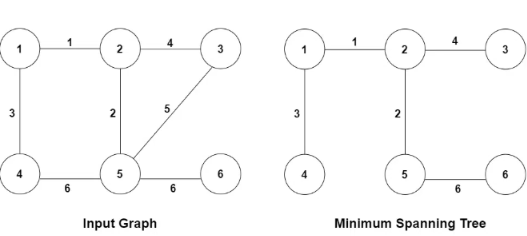

Структура непересекающихся множеств

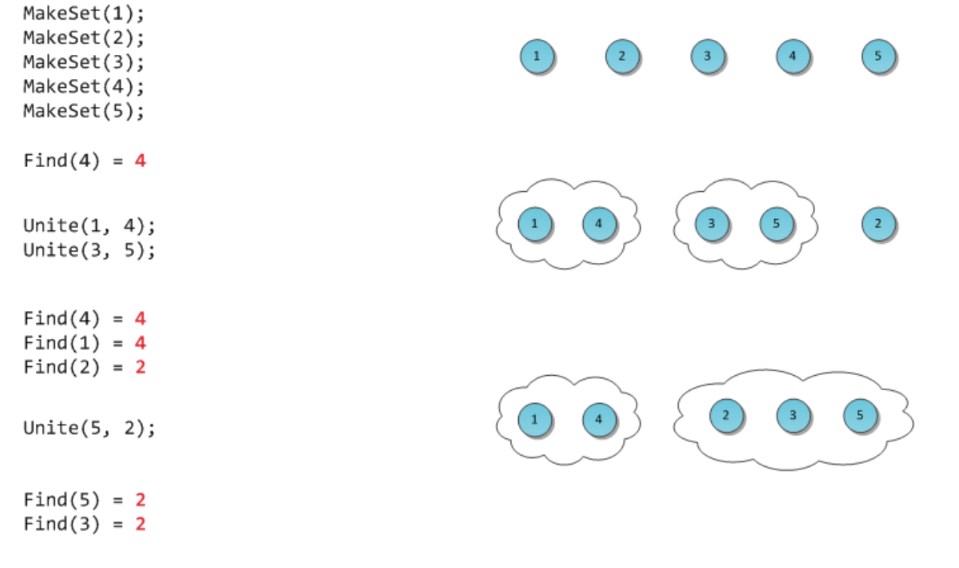

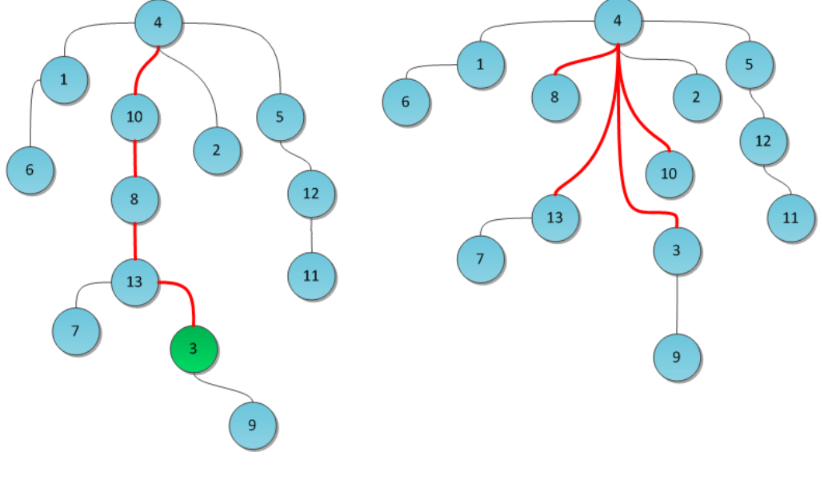

Метод find используется для определения корневого элемента (представителя) множества, к которому принадлежит элемент u. 

Рекурсивный поиск корня: Если элемент u не является своим собственным родителем (то есть self.parent[u] != u), то мы рекурсивно вызываем find для его родителя.

Сжатие пути: После того как корень найден, мы обновляем родителя элемента u на этот корень. Это делает дерево более плоским, что ускоряет будущие вызовы find.

Метод union объединяет два множества, содержащие элементы u и v. Для этого он сначала находит корни множеств, к которым принадлежат u и v, а затем объединяет их, используя ранг (глубину дерева) для оптимизации.

In [2]:
class DisjointSet:
    def __init__(self, n):
        """Инициализация структуры непересекающихся множеств"""
        self.parent = list(range(n))  # Каждый элемент сам себе родитель
        self.rank = [0] * n  # Глубина дерева множества
    
    def find(self, u):
        """Находим корень множества, к которому принадлежит u, с применением сжатия пути"""
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])  # Сжатие пути
        return self.parent[u]
    
    def union(self, u, v):
        """Объединяет два множества по рангу"""
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1


def kruskal(n, edges):
    edges.sort()  # Сортируем рёбра по весу
    ds = DisjointSet(n)  
    mst = []  # Список рёбер MST
    total_weight = 0  # Общий вес MST
    
    for weight, u, v in edges:
        if ds.find(u) != ds.find(v):  # Проверяем, образует ли добавление цикла
            ds.union(u, v)  # Объединяем множества
            mst.append((u, v, weight))  # Добавляем ребро в MST
            total_weight += weight  # Увеличиваем общий вес MST
    
    return mst, total_weight

n = 5
edges = [  
    (1, 0, 1), # (вес, вершина1, вершина2)
    (3, 0, 2),
    (2, 1, 2),
    (4, 1, 3),
    (5, 2, 3),
    (7, 3, 4)
]

mst, weight = kruskal(n, edges)
print("Минимальное остовное дерево (в1, в2, вес):", mst)
print("Общий вес MST:", weight)

Минимальное остовное дерево (в1, в2, вес): [(0, 1, 1), (1, 2, 2), (1, 3, 4), (3, 4, 7)]
Общий вес MST: 14


# Алгоритм Косарайю 

Алгоритм Косарайю предназначен для поиска компонент сильной связности в ориентированном графе и состоит из трёх шагов:

Выполнить поиск в глубину (DFS), пока не будут «помечены» все вершины. Вершина считается «помеченной», когда ей присвоено время выхода из рекурсии (это Вам должны были рассказать на лекции)

Инвертировать исходный граф

Выполнить DFS в порядке убывания пометок вершин.

Полученные деревья каждого такта DFS последнего шага являются компонентами сильной связности

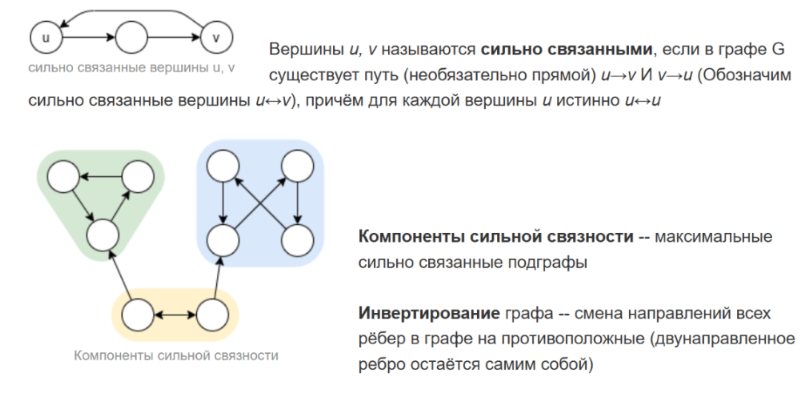

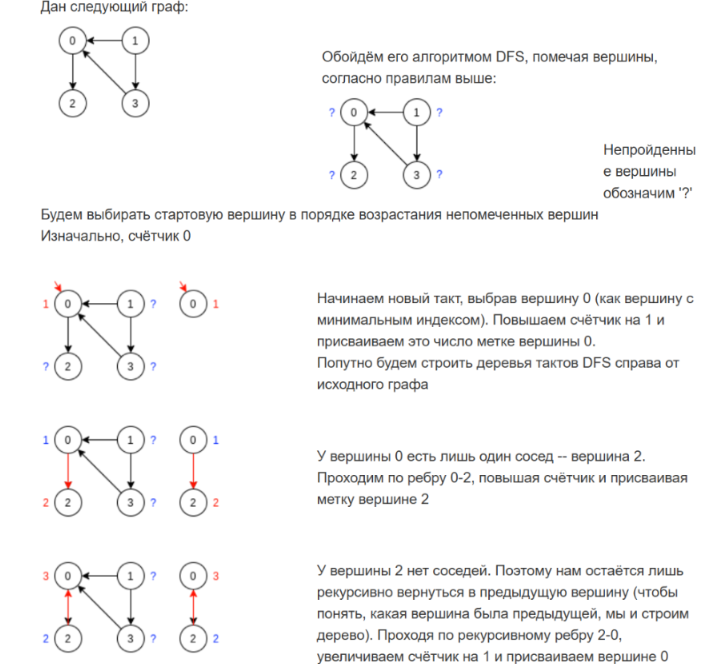

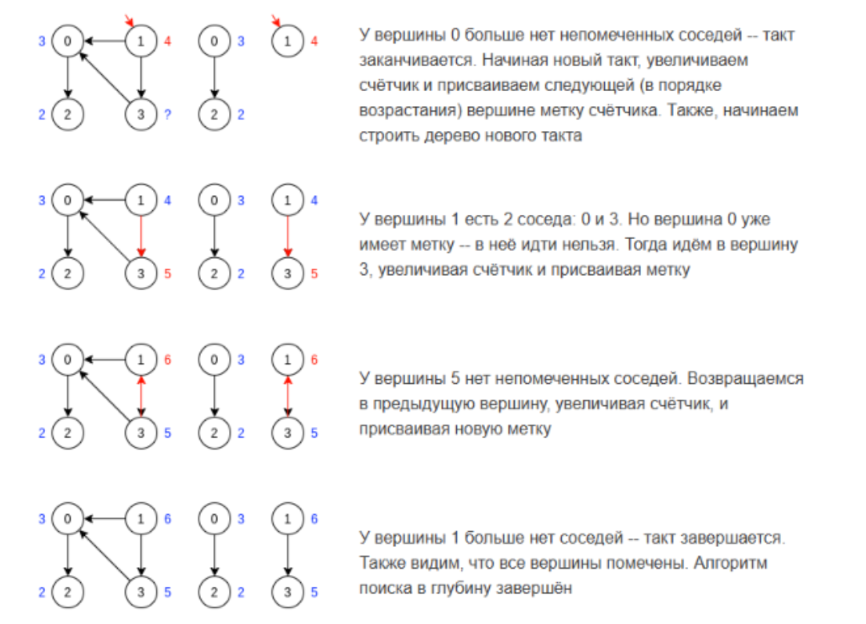

Пусть дан конкретный граф пример

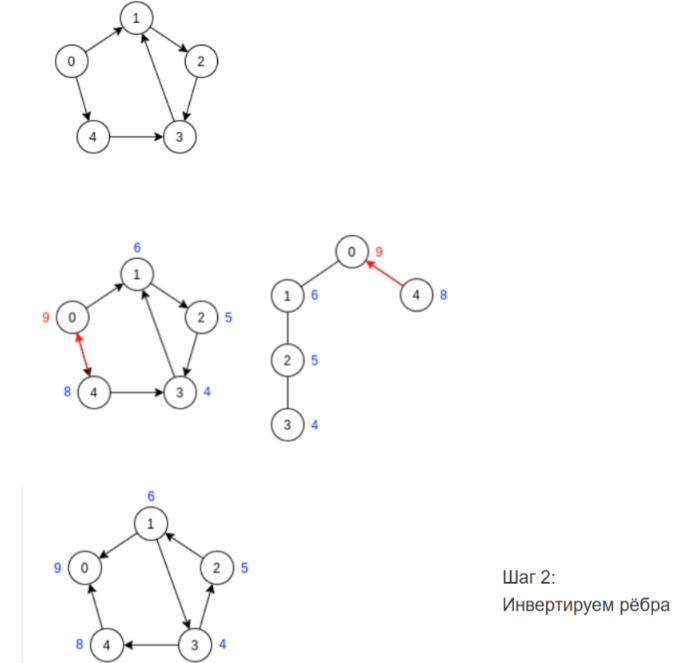

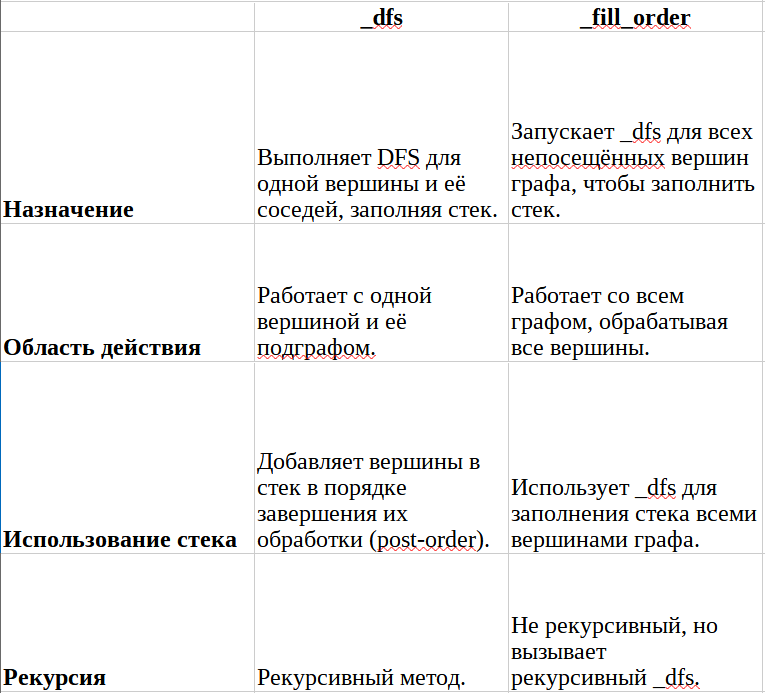

In [99]:
from collections import defaultdict, deque

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)


    def add_edge(self, u, v):
        self.graph[u].append(v)

    def _dfs(self, v, visited, stack):
        visited[v] = True
        for neighbor in self.graph[v]:
            if not visited[neighbor]:
                self._dfs(neighbor, visited, stack)
        stack.append(v)

    def _transpose(self):
        transposed_graph = Graph(self.V)
        for node in self.graph:
            for neighbor in self.graph[node]:
                transposed_graph.add_edge(neighbor, node)
        return transposed_graph

    def _fill_order(self, visited, stack):
        for i in range(self.V):
            if not visited[i]:
                self._dfs(i, visited, stack)

    def _dfs_util(self, v, visited, component):
        visited[v] = True
        component.append(v)
        for neighbor in self.graph[v]:
            if not visited[neighbor]:
                self._dfs_util(neighbor, visited, component)

    def kosaraju_scc(self):
        stack = deque()
        visited = [False] * self.V

        self._fill_order(visited, stack)

        transposed_graph = self._transpose()

        visited = [False] * self.V
        scc_list = []

        while stack:
            node = stack.pop()
            if not visited[node]:
                component = []
                transposed_graph._dfs_util(node, visited, component)
                scc_list.append(component)

        return scc_list

if __name__ == "__main__":
    g = Graph(5)
    g.add_edge(1, 0)
    g.add_edge(0, 2)
    g.add_edge(2, 1)
    g.add_edge(0, 3)
    g.add_edge(3, 4)

    sccs = g.kosaraju_scc()
    print("Сильно связанные компоненты:", sccs)

Сильно связанные компоненты: [[0, 1, 2], [3], [4]]


# Паросочетания

Паросочетание в графе — это множество рёбер, попарно не имеющих общих вершин.

Задача о паросочетании состоит в том, чтобы в данном графе найти паросочетание с наибольшим числом рёбер. 

Формальное определение

Паросочетанием в графе называется произвольное множество его
ребер такое, что каждая вершина графа инцидентна не более чем
одному ребру из этого множества.

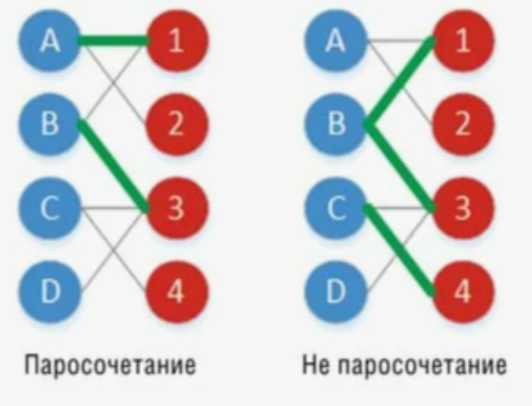

Самые разные практические задачи связаны с построением тех
или иных паросочетаний в двудольных графах

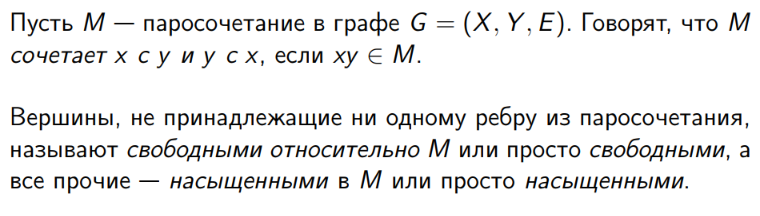

## Теоремы

https://math.mosolymp.ru/upload/files/2022/khamovniki/10/DVK.pdf

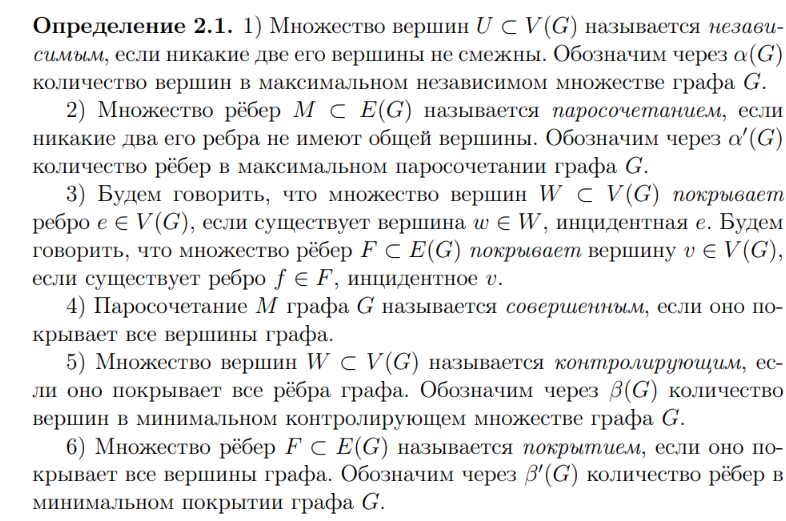

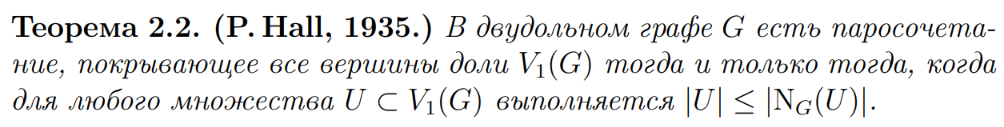

если для каждого множества X вершин двудольного графа G = (L ∪ R, E) множество соседей G(X) ⊆ R содержит не меньше вершин, чем X, то в графе G есть паросочетания размера |L|.

Регулярный граф — это граф, степени всех вершин которого равны, то есть каждая вершина имеет одинаковое количество соседей.

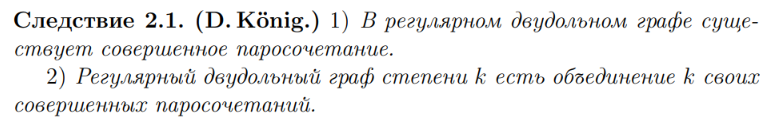

Теорема Кёнига: в любом двудольном графе максимальный размер паросочетания равен минимальному размеру вершинного покрытия.

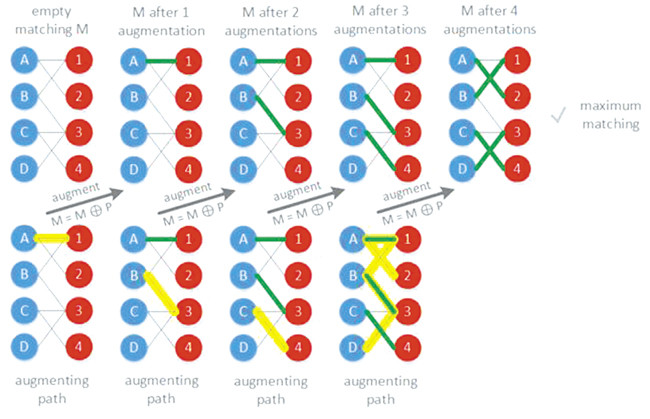

In [112]:
class KuhnAlgorithm:
    def __init__(self, graph, U_size, V_size):
        """
        Инициализация алгоритма.
        :param graph: Список смежности двудольного графа (U -> V).
        :param U_size: Количество вершин в доле U.
        :param V_size: Количество вершин в доле V.
        """
        self.graph = graph  # Граф в виде списка смежности
        self.U_size = U_size  # Количество вершин в доле U
        self.V_size = V_size  # Количество вершин в доле V
        self.pair_U = [-1] * (U_size + 1)  # Массив для хранения паросочетания для U
        self.pair_V = [-1] * (V_size + 1)  # Массив для хранения паросочетания для V

    def dfs(self, u, visited):
        """
        Обход в глубину для поиска увеличивающей цепи.
        :param u: Текущая вершина из доли U.
        :param visited: Массив посещенных вершин.
        :return: True, если найдена увеличивающая цепь, иначе False.
        """
        for v in self.graph[u]:
            if not visited[v]:
                visited[v] = True
                # Если вершина v не соединена или можно найти увеличивающую цепь
                if self.pair_V[v] == -1 or self.dfs(self.pair_V[v], visited):
                    self.pair_U[u] = v
                    self.pair_V[v] = u
                    return True
        return False

    def find_max_matching(self):
        """
        Поиск максимального паросочетания.
        :return: Максимальное паросочетание в виде списка пар (u, v).
        """
        result = 0
        for u in range(1, self.U_size + 1):
            visited = [False] * (self.V_size + 1)
            if self.dfs(u, visited):
                result += 1
        # Возвращаем паросочетание в виде списка пар
        matching = [(u, v) for u, v in enumerate(self.pair_U) if v != -1]
        return matching


if __name__ == "__main__":
    # Граф в виде списка смежности (U -> V)
    # Вершины U: 1, 2, 3
    # Вершины V: 1, 2, 3
    graph = {
        1: [1, 2],
        2: [2],
        3: [3]
    }

    kuhn = KuhnAlgorithm(graph, U_size=3, V_size=3)
    matching = kuhn.find_max_matching()
    print("Максимальное паросочетание:", matching)

Максимальное паросочетание: [(1, 1), (2, 2), (3, 3)]


# Контест

## Задача А

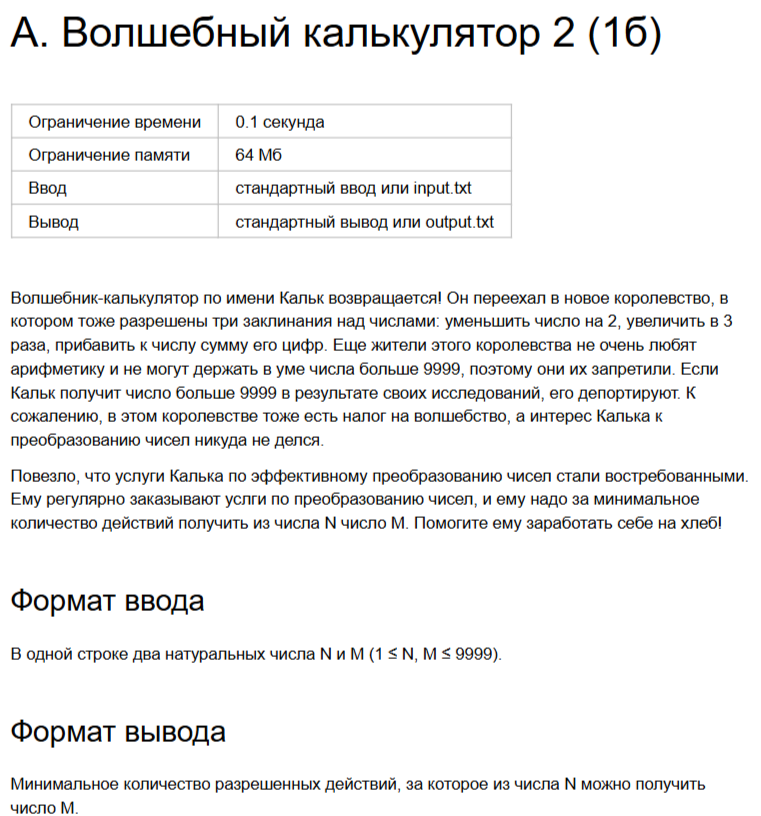

Алгоритм:
Создаем очередь для BFS, в которую будем добавлять числа и количество операций, необходимых для их получения.

Используем множество для отслеживания уже посещенных чисел, чтобы избежать повторного их рассмотрения.

На каждом шаге извлекаем число из очереди и применяем к нему все три операции, добавляя результаты в очередь, если они не превышают 9999 и не были посещены ранее.

Как только мы достигнем числа M, возвращаем количество операций.

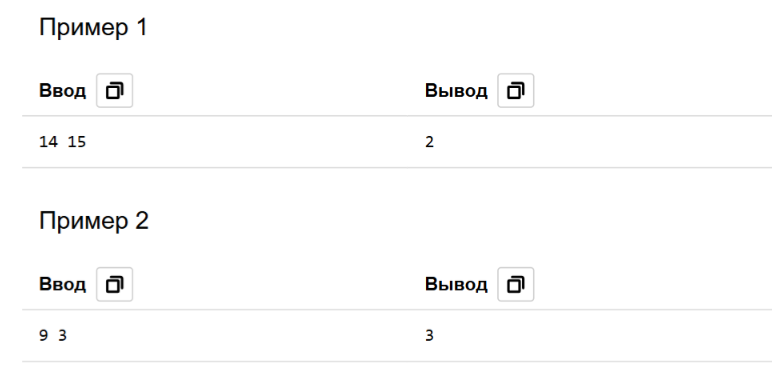

In [59]:
x = 225
print(sum(map(int, str(x))))

9


## Задача Б

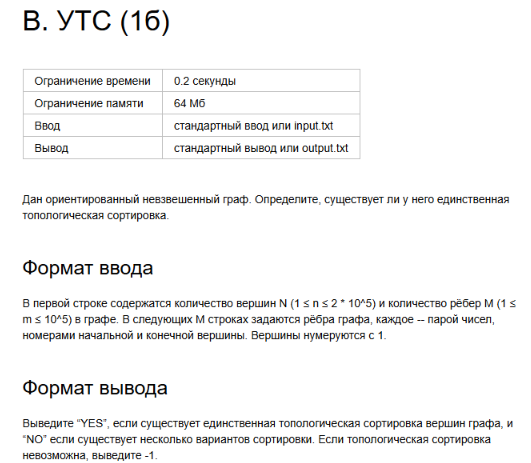

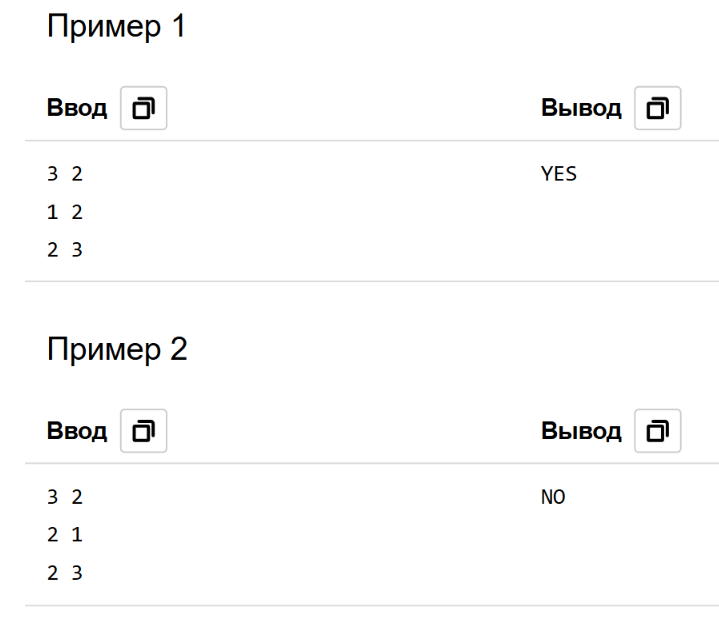

Топологическая сортировка для ориентированного ациклического графа (Directed Acyclic Graphs, далее DAG) — это линейное упорядочение вершин, для которого выполняется следующее условие — для каждого направленного ребра uv вершина u предшествует вершине v в упорядочении. Если граф не является DAG, то топологическая сортировка для него невозможна.

In [ ]:
    (A)
   /   \
  v     v
 (B)   (C)
  \   /
   v v
   (D)


In [121]:
graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': []
}

In [124]:
def topological_sort_dfs(graph):
    visited = set()  #Создаём множество, чтобы не заходить в одну вершину дважды
    stack = [] # будем добавлять вершины после посещения всех их соседей

    def dfs(node):
        if node in visited:
            return  #Если уже в visited, значит, обработали её ранее, поэтому возвращаемся
        visited.add(node)
        
        for neighbor in graph[node]:
            dfs(neighbor)
        
        stack.append(node)  # Добавляем в стек после посещения всех соседей

    for node in graph:
        if node not in visited:
            dfs(node)

    return stack[::-1]  # Разворачиваем стек (порядок должен быть обратным)
print(topological_sort_dfs(graph))

['A', 'C', 'B', 'D']


Для решения задачи нужно определить, существует ли у графа единственная топологическая сортировка. Это возможно только в том случае, если граф является линейным (т.е. представляет собой цепочку вершин, где каждая вершина, кроме последней, имеет ровно одного потомка, а у нее сколько?)))). Если неориентированный образ графа содержит цикл, то топологическая сортировка невозможна. ПОТОМУ ЧТО, ЕСЛИ граф имеет несколько вариантов порядка вершин (например, есть вершины с несколькими независимыми путями), то топологическая сортировка не будет единственной.

## Задача F

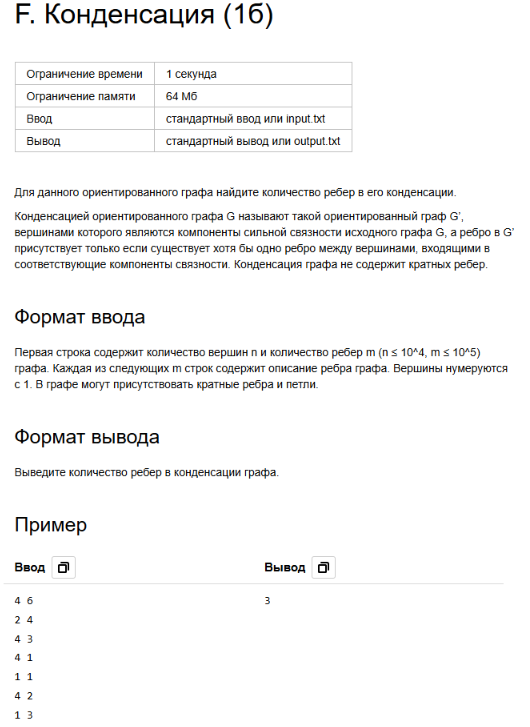

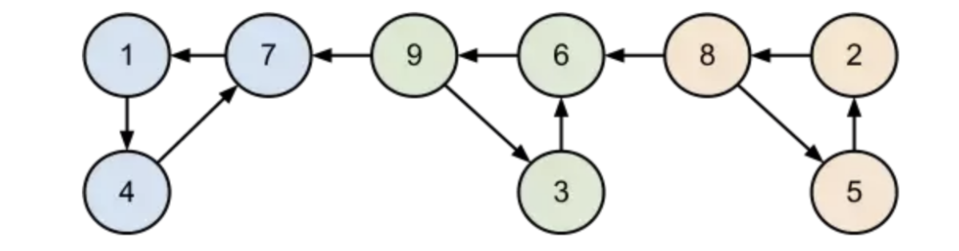

Часто рассматривают граф, составленный из самих компонент сильной связности, а не индивидуальных вершин. Очевидно, такой граф уже будет ациклическим, и с ним проще работать. Задачу о сжатии каждой компоненты сильной связности в одну вершину называют конденсацией графа

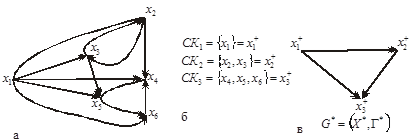